<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Atelier en classe : 31 janvier 2024 #
### Discussion interdisciplinaire de sujets en probablilité & statistiques ###

**Quelques fondements de mathématiques statistiques:** par exemple bien définir variables aléatoires, échantillon et population totale, estimateurs, fonction de distribution cumulative (répartition), densité de probabilité, moments, etc. - **Programme GPH**

**Les distributions statistiques de particules indiscernables:** en particulier celle de Fermi-Dirac avec les notions de potentiel chimique et d’occupation des états en fonction de la température, en analogie avec le remplissage selon le principe principe d’Aufbau introduit en classe pour les atomes à température nulle. - **Programme PHY**

**_Un point de bonus sera accordé à tous les étudiantes et étudiants qui participeront à l'atelier pour discuter des sujets ci-dessus et débuter le travail de la première partie ci-dessous._**

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `TDSrevision-2Dsimulation.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude de la dynamique des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `TDSrevision-2Dsimulation.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
# TDS-2Dsimulation_H24_Part1.py

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour trouver la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ et l'imprimer avec la fonction `print()` dans la cellule qui suit. 

In [2]:
from vpython import *
import numpy as np
p = [vector(4.72099e-24, 9.29431e-24, 0), vector(4.01036e-24, -2.9122e-24, 0), vector(1.9555e-24, -1.31463e-23, 0), vector(-3.94678e-24, 1.81253e-25, 0), vector(-8.43264e-25, -6.91697e-24, 0), vector(-5.11518e-24, 7.35929e-24, 0), vector(-2.13853e-24, 1.07141e-24, 0), vector(4.69602e-24, 5.19845e-24, 0), vector(7.36398e-24, 3.89963e-24, 0), vector(-1.34566e-23, 5.0691e-24, 0), vector(3.56264e-24, -4.51976e-25, 0), vector(1.03314e-23, 3.96763e-25, 0), vector(-3.9841e-24, -1.27964e-24, 0), vector(-2.40462e-24, -2.38622e-24, 0), vector(-2.11224e-24, -1.45645e-23, 0), vector(7.45929e-25, 1.72352e-23, 0), vector(3.61938e-24, -1.33152e-24, 0), vector(-3.46846e-24, 6.546e-24, 0), vector(-6.19346e-24, -3.61522e-24, 0), vector(-5.87696e-24, -2.94195e-24, 0), vector(6.33433e-24, 6.60555e-24, 0), vector(-4.50014e-24, 6.89226e-24, 0), vector(9.64599e-24, -8.29908e-24, 0), vector(-1.14789e-23, -2.60231e-24, 0), vector(-7.57488e-24, -3.2603e-24, 0), vector(-4.18999e-24, -4.08098e-24, 0), vector(-1.83886e-24, 5.17143e-24, 0), vector(7.21904e-24, -2.62426e-24, 0), vector(3.8133e-24, -4.8889e-24, 0), vector(6.53177e-24, 8.7523e-24, 0), vector(-3.05603e-24, 2.5848e-24, 0), vector(5.45126e-24, 4.61429e-24, 0), vector(7.70688e-24, 8.0426e-24, 0), vector(4.25037e-24, 6.50729e-24, 0), vector(-3.15447e-24, -1.05853e-24, 0), vector(5.09913e-24, 8.6877e-24, 0), vector(-5.92128e-24, -4.42198e-24, 0), vector(8.53672e-24, 2.93105e-24, 0), vector(2.42726e-24, -1.20647e-23, 0), vector(-1.00411e-23, 8.14552e-24, 0), vector(7.85505e-25, 7.04835e-24, 0), vector(4.51457e-24, -5.20479e-24, 0), vector(1.90291e-24, 3.38594e-24, 0), vector(-2.42911e-24, -2.48651e-24, 0), vector(-8.12241e-24, -6.28533e-25, 0), vector(7.45455e-24, 4.85244e-24, 0), vector(1.26321e-23, 6.90286e-24, 0), vector(-6.49346e-24, -4.3595e-24, 0), vector(-8.47456e-24, -1.24225e-23, 0), vector(-7.13395e-24, 1.75471e-25, 0), vector(6.40007e-25, -4.88878e-24, 0), vector(1.32312e-23, 7.72967e-24, 0), vector(4.74311e-24, 6.21356e-24, 0), vector(-3.10241e-24, 8.79963e-24, 0), vector(9.12839e-24, -1.94045e-24, 0), vector(2.41167e-24, 3.04408e-24, 0), vector(-8.73499e-24, -5.36221e-25, 0), vector(-3.94361e-24, 6.76968e-24, 0), vector(-1.42947e-25, 7.60672e-24, 0), vector(-1.03394e-23, -1.59059e-24, 0), vector(8.61399e-24, 3.82263e-25, 0), vector(5.11731e-24, 2.44548e-24, 0), vector(1.0395e-23, 4.05177e-24, 0), vector(1.64861e-23, -8.30793e-24, 0), vector(-4.4219e-25, 4.14594e-24, 0), vector(7.64381e-24, 4.3604e-26, 0), vector(-1.05667e-23, -7.14318e-24, 0), vector(-6.27864e-24, 3.64004e-24, 0), vector(-1.24292e-23, 7.31575e-25, 0), vector(-1.56335e-23, -1.04227e-25, 0), vector(-7.03728e-24, 2.16963e-24, 0), vector(9.89724e-24, 2.90258e-24, 0), vector(-9.0255e-25, -2.20245e-24, 0), vector(5.95011e-24, 2.97542e-24, 0), vector(-4.50071e-24, -8.98219e-24, 0), vector(3.19433e-24, -1.53396e-24, 0), vector(1.04763e-23, -9.68929e-25, 0), vector(-5.31885e-25, -7.05097e-24, 0), vector(-6.09374e-24, 4.44885e-24, 0), vector(-9.30834e-25, 4.84493e-24, 0), vector(-9.61146e-25, -1.26778e-23, 0), vector(1.27108e-23, -2.42353e-24, 0), vector(3.17867e-24, -4.05954e-24, 0), vector(-1.76454e-23, -1.99679e-24, 0), vector(-4.1055e-24, 2.80567e-24, 0), vector(-3.20233e-24, -1.48526e-23, 0), vector(-3.14657e-24, 6.28555e-24, 0), vector(3.12939e-24, -3.87552e-24, 0), vector(7.15168e-24, 4.26328e-24, 0), vector(-6.75995e-25, -2.69516e-24, 0), vector(-4.41044e-24, -2.57973e-24, 0), vector(-5.74684e-24, -9.79279e-24, 0), vector(-3.99471e-24, 8.03824e-24, 0), vector(9.53225e-25, 5.80909e-24, 0), vector(4.83635e-24, 1.14569e-23, 0), vector(2.30745e-24, -2.23477e-24, 0), vector(-3.47862e-24, 5.36928e-24, 0), vector(-2.70042e-25, -6.91795e-24, 0), vector(7.48862e-24, 1.46158e-23, 0), vector(-1.08048e-23, -3.1191e-24, 0), vector(-1.57975e-23, 7.92149e-25, 0), vector(6.49936e-24, -2.41982e-24, 0), vector(2.13518e-24, 3.45016e-24, 0), vector(6.54217e-24, 2.06464e-24, 0), vector(-9.31145e-24, 5.9271e-24, 0), vector(-5.37799e-24, -7.84439e-24, 0), vector(-1.58514e-23, -3.31768e-24, 0), vector(-1.27841e-24, 1.27509e-23, 0), vector(1.55864e-24, 1.06514e-23, 0), vector(1.24686e-23, -1.04811e-23, 0), vector(-6.81283e-24, 3.39829e-24, 0), vector(-2.39508e-24, -6.71497e-24, 0), vector(4.40814e-24, -9.23515e-24, 0), vector(-1.41995e-23, 2.80235e-24, 0), vector(-1.05715e-23, 2.17738e-24, 0), vector(8.55557e-24, -8.4797e-25, 0), vector(1.21111e-23, 1.38313e-23, 0), vector(3.69649e-24, -8.29518e-24, 0), vector(6.66201e-24, 7.94093e-24, 0), vector(-7.87109e-24, -2.96487e-24, 0), vector(-3.29747e-24, 5.73028e-24, 0), vector(7.73278e-24, -2.52912e-24, 0), vector(-1.37338e-25, 8.57189e-24, 0), vector(-6.79155e-24, -4.2919e-25, 0), vector(-2.54059e-24, -9.6399e-25, 0), vector(-7.01208e-25, -3.58025e-24, 0), vector(3.38682e-24, -5.5207e-24, 0), vector(2.03492e-24, -2.11483e-24, 0), vector(-6.05148e-24, -2.50252e-24, 0), vector(-7.27145e-24, 8.2438e-24, 0), vector(1.596e-23, 5.04135e-24, 0), vector(6.4861e-24, -3.791e-24, 0), vector(-3.35875e-24, -1.20512e-23, 0), vector(1.41122e-24, 1.33564e-23, 0), vector(-4.53172e-24, -9.84274e-24, 0), vector(-5.44897e-24, 1.0686e-23, 0), vector(2.24362e-24, -2.66841e-24, 0), vector(2.60235e-24, 6.43164e-24, 0), vector(4.94824e-24, 6.67176e-24, 0), vector(-5.86281e-24, -8.95002e-25, 0), vector(-4.66834e-24, 5.99967e-24, 0), vector(-1.11437e-23, 1.57083e-23, 0), vector(7.7005e-24, 1.55434e-25, 0), vector(2.3204e-24, 2.75803e-24, 0), vector(-9.25244e-26, 7.03958e-24, 0), vector(-1.8213e-24, 1.30587e-25, 0), vector(3.69128e-24, -1.37812e-24, 0), vector(-2.15502e-24, 7.81037e-24, 0), vector(-8.10927e-25, 5.53268e-24, 0), vector(-4.13488e-24, -4.21694e-24, 0), vector(2.68237e-24, 5.76724e-24, 0), vector(5.39192e-24, 9.87007e-24, 0), vector(-1.02298e-23, 5.66063e-24, 0), vector(6.07677e-25, -2.43603e-25, 0), vector(2.04524e-24, -8.05303e-24, 0), vector(-1.43489e-24, -1.45074e-24, 0), vector(9.99837e-24, 6.56516e-24, 0), vector(-4.2424e-25, 4.4803e-24, 0), vector(1.29585e-25, 3.29819e-24, 0), vector(2.47931e-24, -2.08624e-24, 0), vector(-8.265e-24, -4.53057e-24, 0), vector(-1.35431e-23, 6.86337e-24, 0), vector(4.82738e-24, -5.45396e-24, 0), vector(7.23068e-24, 1.28573e-23, 0), vector(-2.61507e-24, 6.86102e-26, 0), vector(-4.00955e-24, -4.1921e-24, 0), vector(-1.13299e-23, -2.73479e-24, 0), vector(4.10347e-25, -6.23488e-24, 0), vector(-1.01335e-23, 1.50126e-24, 0), vector(4.15056e-24, 1.93652e-24, 0), vector(2.33193e-24, -8.52315e-24, 0), vector(2.07538e-24, -1.03597e-23, 0), vector(4.4345e-24, 1.18601e-24, 0), vector(-3.20466e-25, -1.029e-24, 0), vector(-4.35416e-24, -7.78577e-24, 0), vector(-3.02673e-24, 2.5334e-24, 0), vector(3.25564e-24, -1.20675e-23, 0), vector(2.36957e-24, -9.95332e-25, 0), vector(1.27241e-23, 1.8679e-24, 0), vector(-8.9754e-24, -8.26361e-25, 0), vector(7.17241e-24, -9.04562e-24, 0), vector(-1.49401e-24, 7.55507e-24, 0), vector(-3.87279e-24, -3.26584e-24, 0), vector(-3.40853e-24, -2.70156e-24, 0), vector(-9.85732e-24, 4.76184e-24, 0), vector(-1.20001e-23, -4.73202e-24, 0), vector(-1.69791e-24, -1.11909e-23, 0), vector(2.16627e-24, -4.6767e-24, 0), vector(2.24916e-25, 5.26875e-24, 0), vector(7.69346e-24, -1.24136e-24, 0), vector(-9.42411e-26, 2.54483e-25, 0), vector(7.21539e-24, -5.59947e-24, 0), vector(1.20836e-23, -1.43221e-23, 0), vector(3.21854e-24, -2.87698e-24, 0), vector(1.44599e-24, -8.39571e-24, 0), vector(7.72387e-24, -1.10238e-24, 0), vector(-9.05947e-25, 7.04616e-24, 0), vector(-1.35064e-23, 1.22741e-23, 0), vector(3.21458e-24, -6.00773e-24, 0), vector(2.10608e-24, 6.74939e-25, 0), vector(5.59781e-24, 9.97502e-25, 0), vector(-1.53565e-24, -8.80689e-24, 0), vector(6.81905e-24, 6.53229e-24, 0), vector(-5.52779e-24, -1.18651e-23, 0), vector(4.50914e-25, 2.33695e-24, 0), vector(-1.14463e-23, -1.81461e-24, 0), vector(-3.55634e-25, -3.41843e-24, 0), vector(-8.95845e-24, -2.10509e-24, 0), vector(4.09182e-24, -5.25093e-24, 0), vector(-5.04545e-24, -5.33756e-24, 0), vector(-1.68667e-24, -3.58358e-24, 0), vector(-7.97055e-25, 2.45139e-24, 0), vector(-3.75131e-24, -2.85288e-24, 0), vector(5.22546e-25, 1.76144e-25, 0), vector(-4.39948e-24, 8.18384e-24, 0), vector(-1.4091e-23, 1.75201e-24, 0), vector(-1.00507e-24, 8.9654e-24, 0), vector(-1.01961e-24, 1.78857e-24, 0), vector(5.40548e-24, 2.55374e-25, 0), vector(-3.97471e-24, -1.16405e-23, 0), vector(2.90823e-24, -1.98963e-24, 0), vector(-1.35755e-23, -4.67852e-25, 0), vector(4.3955e-24, -1.18938e-23, 0), vector(-1.6677e-24, -5.51043e-24, 0), vector(-1.50285e-23, 7.54439e-24, 0), vector(-4.31091e-25, 1.10283e-23, 0), vector(-1.64972e-24, 4.37702e-24, 0), vector(-5.17598e-24, -1.36555e-23, 0), vector(-3.4996e-24, -4.68122e-24, 0), vector(-9.05306e-24, 7.63685e-24, 0), vector(-9.29849e-24, -4.48378e-25, 0), vector(-1.31689e-24, -1.84291e-24, 0), vector(3.93633e-24, -1.07627e-24, 0), vector(-3.7005e-24, -1.06493e-23, 0), vector(5.69153e-26, -6.40203e-24, 0), vector(-1.53158e-24, 5.85117e-24, 0), vector(-1.09075e-25, -2.55868e-24, 0), vector(9.42224e-25, -1.07018e-24, 0), vector(-5.70303e-24, 9.55941e-24, 0), vector(2.81004e-24, 7.96323e-24, 0), vector(4.44571e-24, 1.96245e-24, 0), vector(2.64486e-24, -6.46135e-24, 0), vector(-1.93469e-24, 4.45806e-24, 0), vector(-3.71883e-24, 8.43288e-24, 0), vector(-6.06548e-24, 6.06531e-24, 0), vector(-6.10994e-24, -6.19152e-24, 0), vector(1.16387e-23, 1.94597e-25, 0), vector(7.98575e-24, 4.52578e-24, 0), vector(-1.03467e-23, -1.30012e-24, 0), vector(-1.2651e-24, -1.69524e-24, 0), vector(3.00542e-25, -2.63555e-24, 0), vector(-1.24881e-23, 2.44707e-24, 0), vector(6.85528e-24, -1.628e-25, 0), vector(5.16415e-24, -4.48724e-24, 0), vector(-6.9839e-24, -1.03409e-24, 0), vector(-1.76828e-24, 8.21631e-24, 0), vector(-8.15098e-24, -9.87775e-24, 0), vector(5.29554e-25, 4.68634e-24, 0), vector(-5.04243e-24, 4.36137e-24, 0), vector(9.54725e-24, -9.57666e-25, 0), vector(-4.50651e-24, -4.27955e-24, 0), vector(-1.24722e-23, -3.25485e-24, 0), vector(7.52156e-24, 5.63073e-24, 0), vector(-1.9891e-24, 2.82909e-24, 0), vector(7.83594e-24, 1.6597e-24, 0), vector(8.38462e-24, 9.08635e-24, 0), vector(3.15903e-24, -7.94942e-24, 0), vector(-9.59742e-24, -7.64253e-24, 0), vector(-6.28795e-24, -2.55632e-24, 0), vector(7.26733e-24, -5.59815e-24, 0), vector(1.82838e-24, 7.19029e-24, 0), vector(9.62111e-24, -9.88738e-24, 0), vector(-3.71132e-24, 3.69234e-24, 0), vector(1.15764e-26, -2.9265e-24, 0), vector(8.48247e-24, -1.62821e-24, 0), vector(-3.59138e-24, 3.82583e-24, 0), vector(-1.55704e-24, 2.32276e-24, 0), vector(1.15333e-23, 5.8893e-24, 0), vector(-6.31388e-24, -1.40275e-23, 0), vector(-1.76767e-24, 4.39275e-24, 0), vector(-3.25057e-24, -2.77575e-24, 0), vector(2.90542e-24, -8.51938e-24, 0), vector(7.75137e-25, 3.74417e-24, 0), vector(1.00165e-23, -3.64692e-24, 0), vector(-2.40546e-24, -7.52778e-24, 0), vector(-9.26167e-24, -1.89177e-23, 0), vector(2.67578e-24, -3.04244e-25, 0), vector(-1.67975e-24, 4.12954e-25, 0), vector(-5.11017e-24, -1.24366e-24, 0), vector(3.19174e-24, 1.44938e-23, 0), vector(-9.1208e-24, 3.39807e-24, 0), vector(-3.39828e-24, 3.37987e-24, 0), vector(-2.4091e-24, 4.69343e-24, 0), vector(9.06926e-24, -9.47558e-25, 0), vector(6.03747e-24, 6.24446e-24, 0), vector(-1.9243e-24, -8.44152e-25, 0), vector(5.64834e-24, -6.60757e-24, 0), vector(-1.01523e-23, -2.3506e-24, 0), vector(3.67191e-24, -6.2231e-24, 0), vector(4.14432e-24, 2.78235e-24, 0)]
p_2 = []
for vec in p:
    p_2.append(mag2(vec))

avg_p_2 = np.mean(p_2)
print(avg_p_2)
# 8.4e-47

<IPython.core.display.Javascript object>

8.400002040995114e-47



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ répartissant l'énergie également sur chaque degré de liberté ici en translation seulement, d'où au total pour $i=1,2\text{ ou } 3$ dimensions d'espace réel
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=i\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [3]:
# Déclaration de variables physiques "Typical values"
mass = 4E-3/6E23 # helium mass
Ratom = 0.01 # wildly exaggerated size of an atom
k = 1.4E-23 # Boltzmann constant
T = 300 # around room temperature


Einit = (3/2)*k*T
Efinal = avg_p_2/(2*mass)
print("Einit =", Einit)
print("Efinal =", Efinal)
print("Einit/Efinal =", Einit/Efinal)

#Einit = 6.299999999999999e-21
#Efinal = 6.300000000000001e-21
#Einit/Efinal = 0.9999999999999998

T = 300 # around room temperature
T_final = (2/3)*avg_p_2/(2*mass*k)
print("Température initiale =", T)
print("Température finale =", T_final)
print("Rapport T/T_final =", T/T_final)

#Température initiale = 300
#Température finale = 299.9999999999999
#Rapport T/T_final = 1.0000000000000004

#La température n'a pas changé de manière significative tel qu'attendu pour ce modèle.

Einit = 6.299999999999999e-21
Efinal = 6.300001530746336e-21
Einit/Efinal = 0.9999997570244501
Température initiale = 300
Température finale = 300.0000728926827
Rapport T/T_final = 0.9999997570244501


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [4]:
distParcouru = [] # actualisée à chaque colision
dtCollision = [] # actualisée à chaque colision
posParticule = [] # reset à chaque collision et incrémentée à chaque tick
tickParticule = 0 # reset à chaque collision et incrémentée à chaque tick
vParticule = [] # Vecteur contenant la vitesse de la particule suivie à chaque collision
atom_id = 197

def followParticule(posParticule):
    dTot = 0
    for i, vector in enumerate(posParticule):
        if i+1 != len(posParticule):
            dX = np.abs(vector.x - posParticule[i+1].x)
            dY = np.abs(vector.y - posParticule[i+1].y)
            dTot += np.sqrt(dX**2+dY**2)
    return dTot

# Exemple de réponse possible :



# distance parcourue entre chaque collision : [0, 0.018366915990352665, 0.0759099010884474, 0.0929966926777815, 0.03359328169654027, 0.08997469025699102, 0.13043395250775527, 0.061948629884101596, 1.3673668280711884, 0.06669884021890397, 1.180707360614538, 0.6701508162985433, 0.3145510860457814, 1.24509782108234, 0.6134087641995144, 0.020879271289770004, 0.06981373380493557, 0.3832304770138317, 0.07291756397734815, 0.04371605943893324, 0.0336378860881871, 0.10776095936083216, 0.36599777026438274, 0, 0.1690784562556821, 0.038094575834455933, 0.11525895184068494, 0.07618156432766761, 0.7339514987700417, 0.08903714445042522, 0.19842025572888955, 0.019290782645854473, 0.32210139537527654, 0.32507555871939836, 0.05935447207952358, 0.17148053661970955, 0.3469622213678006, 0.05143261068295239, 0.06930514205675957, 0, 0.008447691350516932, 0.003655555870801868, 0, 0.03380643045015491, 0.11295918791154834, 0.7361448934586753]
# nombre de tick entre chaque collision : [1, 2, 5, 9, 6, 11, 109, 7, 133, 7, 43, 27, 13, 61, 71, 3, 7, 34, 7, 5, 4, 5, 18, 1, 10, 10, 14, 9, 58, 6, 23, 2, 77, 50, 14, 11, 24, 4, 5, 1, 5, 10, 1, 11, 15, 48]  
# Résultat après 2000 ticks


**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [5]:
# Exemple de réponse possible :
distParcouru = [0.375299614818726, 0.190791636035614, 1.1905405358711734, 0.09068459400828932, 0.5324413757972298, 0.028291057321370622, 0.08849215016982008, 0.31257656712533516, 0.9117078704394799, 0.4560300177779285, 0.9408639410914713, 0, 0.0895026478356976, 0.3785555372107414, 0.07121869640803409, 0.361850133635499, 0.361850133635499, 0, 0.059395446526543404, 0.10632127069581503, 0.5256101760779819, 0.07004135905832186, 0.20852531945843703, 0.20852531945843703, 0.02582317226303074, 0.01599175708804225, 0.16950698908182849, 0.19270930053513996, 0.08305392148220805, 0.06910108867521818, 0.31181095368483974, 0.13602738527965627, 1.5499669973437826, 0.007492007039815042, 0.06596161780125386, 0.1998179722029648, 0.8958729460044283, 0.11377131358244, 0.7458416109071144, 0.10571810928857403, 0.15132551019540794, 0.2734450334086132, 1.9989227521405586, 0.16441890553255492, 0.019281319410962488, 0.20886648486425996, 0.88041501085537, 0.009113655634885818, 0.22650952280909134, 0.4180936744629918, 0.019537181063163243, 0.20014216057157685, 0.02368399559019731, 0.35773028079308317, 0, 0.17758769359332374, 0.09487087201280511, 0.2254611702866018, 0, 0.04672834872039704, 0.525339559786045, 0.11736727989262637, 0.17416871704310433, 0.015952171200020827, 0.13927272253212467, 0.2240623944264091, 0.2511803938185341, 0.09721527356709744, 0, 0.6966158023041095, 0.32818779298522327, 0.5989931636929223, 0.3352286809937699, 0.1851520518338455, 0.8190685154665994, 0.04068214334256983, 0.2414662907855344, 0.6745124540927033, 0.41410641377632496, 1.1347848355479757, 0.05241354132323337, 0.12256848112594024]
dtCollision = [37, 12, 80, 9, 26, 10, 13, 60, 77, 37, 65, 1, 11, 23, 5, 21, 21, 1, 12, 26, 41, 6, 17, 17, 4, 4, 25, 22, 11, 7, 32, 10, 60, 4, 9, 12, 57, 22, 92, 6, 8, 19, 121, 9, 2, 13, 52, 2, 39, 30, 7, 10, 3, 31, 1, 21, 11, 13, 1, 6, 59, 14, 12, 5, 13, 44, 27, 15, 1, 80, 24, 21, 15, 14, 90, 5, 17, 43, 26, 78, 11, 12]

print("I_moy = ", np.mean(distParcouru), "unités")
print("τ =", np.mean(dtCollision), "ticks")
# Exemple de réponse possible :

I_moy =  0.3040494487097603 unités
τ = 24.75609756097561 ticks


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [6]:
# Exemple de réponse possible :
vParticule = [vector(1041.83, -684.395, 0), vector(1661.36, -498.273, 0), vector(440.577, 1075.5, 0), vector(511.216, 1011.74, 0), vector(-665.285, 2023.19, 0), vector(256.835, 181.242, 0), vector(-376.908, 285.51, 0), vector(-316.907, -378.243, 0), vector(-604.692, 1403.06, 0), vector(-1241.94, -202.367, 0), vector(-674.112, 401.537, 0), vector(-1306.01, -505.266, 0), vector(83.1488, -891.156, 0), vector(-884, 1112.65, 0), vector(-1447.25, 1037.07, 0), vector(-1269.53, 1289.06, 0), vector(276.395, -200.06, 0), vector(246.124, -168.317, 0), vector(434.866, -320.073, 0), vector(207.516, 307.796, 0), vector(1002.25, -849.797, 0), vector(-692.723, -1217.56, 0), vector(-431.596, -1229.74, 0), vector(-816.743, -119.614, 0), vector(-793.284, 334.11, 0), vector(-227.992, -481.841, 0), vector(702.35, 74.3983, 0), vector(-274.436, 875.666, 0), vector(-373.148, 741.995, 0), vector(-606.994, -978.742, 0), vector(-979.998, 226.543, 0), vector(-455.462, -1441.16, 0), vector(-2626.21, -67.085, 0), vector(203.921, -144.164, 0), vector(538.981, -623.965, 0), vector(1815.89, -48.0895, 0), vector(177.75, -203.841, 0), vector(-23.7481, -541.247, 0), vector(-391.658, 2325.94, 0), vector(-1590.41, -265.005, 0), vector(-649.58, -2061.89, 0), vector(1448.88, 456.647, 0), vector(-1685.64, 1126.04, 0), vector(1773.98, 1037.79, 0), vector(292.045, 1905.89, 0), vector(73.4967, 1739, 0), vector(-1190.23, -463.192, 0), vector(-524.936, -745.003, 0), vector(587.293, 73.2964, 0), vector(-1015.96, 787.661, 0), vector(-172.886, -275.932, 0), vector(2221.64, 97.9416, 0), vector(1134.57, 339.233, 0), vector(1156.24, -291.575, 0), vector(1310.82, 99.5945, 0), vector(-886.611, 48.5298, 0), vector(-946.676, 62.0782, 0), vector(-1845.43, -352.737, 0), vector(923.306, -992.067, 0), vector(923.057, 146.226, 0), vector(-684.64, -595.865, 0), vector(-902.211, -33.3018, 0), vector(-1083.69, -993.575, 0), vector(-394.765, 56.6136, 0), vector(678.148, 539.178, 0), vector(-376.151, -360.596, 0), vector(1019.43, -10.6678, 0), vector(692.1, 56.4101, 0), vector(526.788, 122.771, 0), vector(24.4924, -1189.04, 0), vector(-788.297, 368.866, 0), vector(2690.02, -1316.66, 0), vector(1893.06, -1466.26, 0), vector(155.018, 1415.79, 0), vector(920.451, 338.988, 0), vector(976.14, 285.568, 0), vector(1375.18, -565.878, 0), vector(-1890.44, -83.7556, 0), vector(764.652, 1895.46, 0), vector(-515.239, -416.643, 0), vector(-95.6021, -515.343, 0), vector(1319.07, -843.702, 0)]
vParticule_avg = np.mean(vParticule)

print("Vitesse vectorielle de la particule à chaque collision :", vParticule)
print("Vitesse vectorielle moyenne de la particule :", vParticule_avg)

Vitesse vectorielle de la particule à chaque collision : [<1041.83, -684.395, 0>, <1661.36, -498.273, 0>, <440.577, 1075.5, 0>, <511.216, 1011.74, 0>, <-665.285, 2023.19, 0>, <256.835, 181.242, 0>, <-376.908, 285.51, 0>, <-316.907, -378.243, 0>, <-604.692, 1403.06, 0>, <-1241.94, -202.367, 0>, <-674.112, 401.537, 0>, <-1306.01, -505.266, 0>, <83.1488, -891.156, 0>, <-884, 1112.65, 0>, <-1447.25, 1037.07, 0>, <-1269.53, 1289.06, 0>, <276.395, -200.06, 0>, <246.124, -168.317, 0>, <434.866, -320.073, 0>, <207.516, 307.796, 0>, <1002.25, -849.797, 0>, <-692.723, -1217.56, 0>, <-431.596, -1229.74, 0>, <-816.743, -119.614, 0>, <-793.284, 334.11, 0>, <-227.992, -481.841, 0>, <702.35, 74.3983, 0>, <-274.436, 875.666, 0>, <-373.148, 741.995, 0>, <-606.994, -978.742, 0>, <-979.998, 226.543, 0>, <-455.462, -1441.16, 0>, <-2626.21, -67.085, 0>, <203.921, -144.164, 0>, <538.981, -623.965, 0>, <1815.89, -48.0895, 0>, <177.75, -203.841, 0>, <-23.7481, -541.247, 0>, <-391.658, 2325.94, 0>, <-1590.41, 

**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

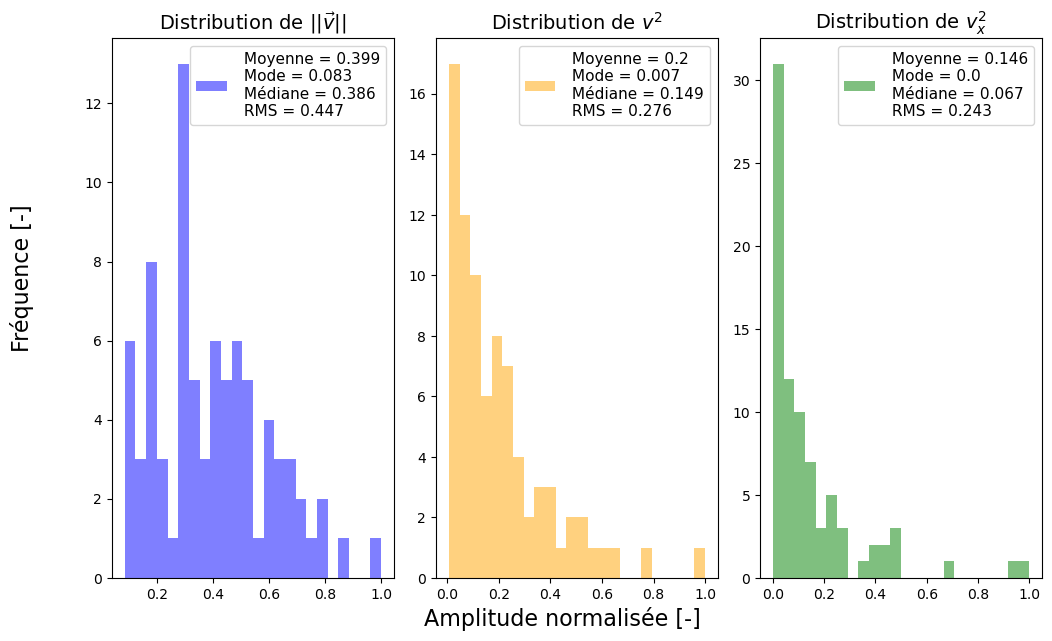

In [7]:
from scipy.stats import mode, norm
import matplotlib.pyplot as plt

# Exemple de réponse possible :
vParticule = [vector(1041.83, -684.395, 0), vector(1661.36, -498.273, 0), vector(440.577, 1075.5, 0), vector(511.216, 1011.74, 0), vector(-665.285, 2023.19, 0), vector(256.835, 181.242, 0), vector(-376.908, 285.51, 0), vector(-316.907, -378.243, 0), vector(-604.692, 1403.06, 0), vector(-1241.94, -202.367, 0), vector(-674.112, 401.537, 0), vector(-1306.01, -505.266, 0), vector(83.1488, -891.156, 0), vector(-884, 1112.65, 0), vector(-1447.25, 1037.07, 0), vector(-1269.53, 1289.06, 0), vector(276.395, -200.06, 0), vector(246.124, -168.317, 0), vector(434.866, -320.073, 0), vector(207.516, 307.796, 0), vector(1002.25, -849.797, 0), vector(-692.723, -1217.56, 0), vector(-431.596, -1229.74, 0), vector(-816.743, -119.614, 0), vector(-793.284, 334.11, 0), vector(-227.992, -481.841, 0), vector(702.35, 74.3983, 0), vector(-274.436, 875.666, 0), vector(-373.148, 741.995, 0), vector(-606.994, -978.742, 0), vector(-979.998, 226.543, 0), vector(-455.462, -1441.16, 0), vector(-2626.21, -67.085, 0), vector(203.921, -144.164, 0), vector(538.981, -623.965, 0), vector(1815.89, -48.0895, 0), vector(177.75, -203.841, 0), vector(-23.7481, -541.247, 0), vector(-391.658, 2325.94, 0), vector(-1590.41, -265.005, 0), vector(-649.58, -2061.89, 0), vector(1448.88, 456.647, 0), vector(-1685.64, 1126.04, 0), vector(1773.98, 1037.79, 0), vector(292.045, 1905.89, 0), vector(73.4967, 1739, 0), vector(-1190.23, -463.192, 0), vector(-524.936, -745.003, 0), vector(587.293, 73.2964, 0), vector(-1015.96, 787.661, 0), vector(-172.886, -275.932, 0), vector(2221.64, 97.9416, 0), vector(1134.57, 339.233, 0), vector(1156.24, -291.575, 0), vector(1310.82, 99.5945, 0), vector(-886.611, 48.5298, 0), vector(-946.676, 62.0782, 0), vector(-1845.43, -352.737, 0), vector(923.306, -992.067, 0), vector(923.057, 146.226, 0), vector(-684.64, -595.865, 0), vector(-902.211, -33.3018, 0), vector(-1083.69, -993.575, 0), vector(-394.765, 56.6136, 0), vector(678.148, 539.178, 0), vector(-376.151, -360.596, 0), vector(1019.43, -10.6678, 0), vector(692.1, 56.4101, 0), vector(526.788, 122.771, 0), vector(24.4924, -1189.04, 0), vector(-788.297, 368.866, 0), vector(2690.02, -1316.66, 0), vector(1893.06, -1466.26, 0), vector(155.018, 1415.79, 0), vector(920.451, 338.988, 0), vector(976.14, 285.568, 0), vector(1375.18, -565.878, 0), vector(-1890.44, -83.7556, 0), vector(764.652, 1895.46, 0), vector(-515.239, -416.643, 0), vector(-95.6021, -515.343, 0), vector(1319.07, -843.702, 0)]

v_norm = []
v_2 = []
v_x = []
for elem in vParticule:
    v_norm.append(mag(elem))
    v_2.append(mag2(elem))
    v_x.append(elem.x)

v_x = np.array(v_x)
v_x_2 = v_x**2

v_norm_normalized = np.array(v_norm)/max(v_norm)
v_2_normalized = np.array(v_2)/max(v_2)
v_x_2_normalized = v_x_2/max(v_x_2)

bin_nb = 24
bin_range = (0, 1)

param_list = []
for arr in [v_norm_normalized, v_2_normalized, v_x_2_normalized]:
    rms = np.sqrt(np.mean(arr**2))
    var_list = [np.mean(arr), mode(arr, axis=None, keepdims=False)[0], np.median(arr), rms]
    param_list.append(var_list)

i=0
for var in param_list:

    rounding_list = []
    for elem in var:

        rounding_list.append(round(elem, 3))
    param_list[i] = rounding_list
    i += 1

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
plt.subplots_adjust(bottom=0.2, top=2, wspace=0.15, hspace=0.2)
ax[0].hist(v_norm_normalized, bins=bin_nb, alpha=0.5, label=f" Moyenne = {param_list[0][0]}\n"
                                               f" Mode = {param_list[0][1]}\n Médiane = {param_list[0][2]}"
            f"\n RMS = {param_list[0][3]}", color="b")
ax[0].legend(loc="upper right", fontsize="11")
ax[0].set_title(r"Distribution de $||\vec{v}||$", fontsize="14")
ax[1].hist(v_2_normalized, bins=bin_nb, alpha=0.5, label=f" Moyenne = {param_list[1][0]}\n"
                                               f" Mode = {param_list[1][1]}\n Médiane = {param_list[1][2]}"
            f"\n RMS = {param_list[1][3]}", color="orange")
ax[1].legend(loc="upper right", fontsize="11")
ax[1].set_title(r"Distribution de $v^2$", fontsize="14")
ax[2].hist(v_x_2_normalized, bins=bin_nb, alpha=0.5, label=f" Moyenne = {param_list[2][0]}\n"
                                               f" Mode = {param_list[2][1]}\n Médiane = {param_list[2][2]}"
            f"\n RMS = {param_list[2][3]}", color="g")
ax[2].legend(loc="upper right", fontsize="11")
ax[2].set_title(r"Distribution de $v_x^2$", fontsize="14")
fig.text(0.5, 0.04, 'Amplitude normalisée [-]', ha='center', fontsize="16")
fig.text(0.04, 1.2, 'Fréquence [-]', va='center', rotation='vertical', fontsize="16")
plt.show()
#

**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

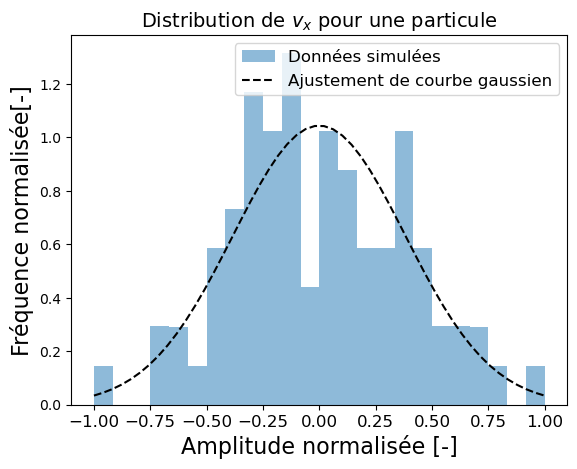

Moyenne = -0.0010841033732453935, Mode = -0.9762789867733326, Médiane = -0.02218388710864603, RMS = 0.38202630053161335, STD = 0.38202476230965277


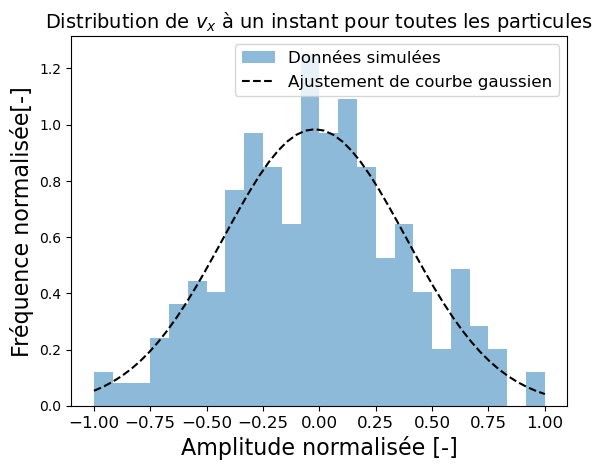

Moyenne = -0.020312100918827083, Mode = -1.2055949553265768, Médiane = -0.017187370565412544, RMS = 0.4059590205894201, STD = 0.4054505456331075


In [8]:
#Le théorème central limite dit qu'un ensemble de variables aléatoires indépendantes et identiquement distribuées tend vers
#une distribution normale (gaussienne). Parmi les distributions de vitesses du numéro précédent, on remarque que la distribution
#de la norme de v ressemble à une distribution de Maxwell-Boltzmann tel qu'attendu. Par contre, la distribution de v_x^2 fait 
#penser à la moitié d'une distribution gaussienne. Ainsi, on choisit de comparer la distribution de la composante v_x à travers
#le temps pour une seule particule à une distribution normale.

# Exemple de réponse possible :
vitesse = [vector(-111.831, 708.088, 0), vector(442.757, 164.173, 0), vector(-137.907, 171.855, 0), vector(-424.58, 284.134, 0), vector(775.834, 1229.9, 0), vector(495.562, 838.554, 0), vector(-654.863, 317.423, 0), vector(-980.47, -435.409, 0), vector(-532.391, 698.595, 0), vector(-673.888, -1519.1, 0), vector(156.352, 145.633, 0), vector(126.743, 834.689, 0), vector(-646.511, 1392.33, 0), vector(61.5142, -163.053, 0), vector(-644.935, -370.573, 0), vector(-60.2484, 382.085, 0), vector(-45.0059, -298.422, 0), vector(503.82, 1890, 0), vector(-36.3268, -320.056, 0), vector(-514.623, -163.956, 0), vector(-601.616, 2133.43, 0), vector(721.369, 522.107, 0), vector(280.994, 1312.89, 0), vector(445.931, -743.199, 0), vector(303.706, 645.003, 0), vector(-1058.22, -1569.39, 0), vector(344.966, 225.988, 0), vector(-1928.49, 655.248, 0), vector(-987.07, 364.266, 0), vector(-403.191, 221.704, 0), vector(-626.017, -825.638, 0), vector(-1477.77, -19.7383, 0), vector(-1026.83, 678.844, 0), vector(-178.763, -944.775, 0), vector(1539.73, -18.0693, 0), vector(491.959, 588.466, 0), vector(-813.848, 487.962, 0), vector(-1030.54, -950.014, 0), vector(1749.8, -310.322, 0), vector(-1168.45, 1251.8, 0), vector(1755.1, 1516.73, 0), vector(293.424, -207.167, 0), vector(1418.22, 45.7105, 0), vector(-770.287, -1471.52, 0), vector(714.268, 1431.71, 0), vector(-1054.32, -1883.28, 0), vector(-117.408, -193.802, 0), vector(1193.01, 855.46, 0), vector(989.323, 1095.71, 0), vector(-376.579, -565.945, 0), vector(-1477.91, -574.107, 0), vector(-245.619, -1384.47, 0), vector(-781.893, 1425.13, 0), vector(-525.251, 449.016, 0), vector(70.5319, 155.08, 0), vector(-1283.77, -470.993, 0), vector(850.46, -2357.9, 0), vector(-683.596, -2006.68, 0), vector(578.355, -187.51, 0), vector(-630.103, 1928.36, 0), vector(1409.67, -3.77363, 0), vector(-821.514, -1900.48, 0), vector(2233.56, 1032.69, 0), vector(1179.48, -106.828, 0), vector(-596.54, -1068.83, 0), vector(169.463, -871.152, 0), vector(-182.174, -611.545, 0), vector(-413.414, -106.449, 0), vector(-275.649, -2087.99, 0), vector(259.151, 320.4, 0), vector(144.504, -532.188, 0), vector(1040.58, -718.093, 0), vector(1926.52, 790.063, 0), vector(-813.7, 1293.57, 0), vector(447.367, -830.222, 0), vector(-75.0425, -393.654, 0), vector(-832.509, 1314.31, 0), vector(-407.54, -393.786, 0), vector(-2534.25, 377.592, 0), vector(940.908, -1530.74, 0), vector(-706.901, -526.716, 0), vector(719.521, -140.858, 0), vector(-344.857, 648.304, 0), vector(-1301.07, 2587.77, 0), vector(-1092.45, -179.171, 0), vector(-1455.6, -71.8735, 0), vector(1504.32, 524.237, 0), vector(-224.486, -473.254, 0), vector(-639.025, 2045.23, 0), vector(-517.664, -1765.98, 0), vector(-909.398, -908.244, 0), vector(818.919, 138.494, 0), vector(703.747, 1002.2, 0), vector(-1516.69, 746.907, 0), vector(-861.447, 222.756, 0), vector(428.023, -1611.97, 0), vector(1674.14, -511.835, 0), vector(-520.12, -2386.98, 0), vector(141.353, 652.668, 0), vector(733.479, -431.411, 0), vector(-752.751, 567.988, 0), vector(447.307, -1015.63, 0), vector(-429.787, 332.235, 0), vector(931.338, 1086.33, 0), vector(-123.562, -608.017, 0), vector(-1306.1, 1281.55, 0), vector(-111.23, 1522.51, 0), vector(1438.17, -320.205, 0), vector(1145.98, 2837.39, 0), vector(410.975, -806.092, 0), vector(431.001, 576.627, 0), vector(-158.058, 563.283, 0), vector(-609.168, -2.49031, 0), vector(1525.8, -768.11, 0), vector(195.987, -2052.31, 0), vector(-2143.95, -1227.73, 0), vector(566.322, 242.835, 0), vector(1603.77, 754.928, 0), vector(-146.508, -219.76, 0), vector(896.454, 620.97, 0), vector(-512.908, 644.957, 0), vector(-1027.35, 1710.26, 0), vector(215.863, -2424.21, 0), vector(-891.734, -226.267, 0), vector(-419.723, -1403.92, 0), vector(423.932, 640.311, 0), vector(1436.3, 1372.18, 0), vector(227.566, 887.648, 0), vector(-879.522, -737.717, 0), vector(-929.56, 961.546, 0), vector(714.162, -143.111, 0), vector(-28.3831, -808.738, 0), vector(-391.772, -788.153, 0), vector(-1073.14, 382.842, 0), vector(-360.172, -1024.46, 0), vector(112.064, -913.876, 0), vector(963.156, -611.053, 0), vector(1867.96, 137.035, 0), vector(-118.36, -1737.65, 0), vector(-685.23, -1199.52, 0), vector(943.054, 589.703, 0), vector(816.689, 1010.04, 0), vector(278.941, 760.205, 0), vector(-843.726, -864.19, 0), vector(242.644, 502.687, 0), vector(-1283.65, 1674.68, 0), vector(224.074, -698.275, 0), vector(-1238.19, -1230.73, 0), vector(349.945, 378.103, 0), vector(-969.039, 617.588, 0), vector(-819.059, -421.937, 0), vector(110.817, -392.3, 0), vector(139.458, 973.868, 0), vector(-1751.33, 1440.6, 0), vector(1778.53, 1235.39, 0), vector(-182.53, -160.135, 0), vector(375.639, 1648.72, 0), vector(1227.41, 660.834, 0), vector(-914.263, 1052.33, 0), vector(629.138, -446.094, 0), vector(-498.376, -1574.39, 0), vector(-1532.58, 451.205, 0), vector(651.614, -4.45841, 0), vector(31.6884, -137.14, 0), vector(279.627, -402.555, 0), vector(1701.85, 163.768, 0), vector(929.091, 1879.85, 0), vector(297.734, -556.639, 0), vector(-1319.06, -2019.32, 0), vector(339.064, 523.997, 0), vector(-2196.21, -837.631, 0), vector(-607.991, -459.383, 0), vector(109.029, -1306.7, 0), vector(-770.73, 1194.77, 0), vector(932.348, -758.429, 0), vector(-36.0394, 242.951, 0), vector(-2398.38, 280.88, 0), vector(202.164, -1779.55, 0), vector(-1665.35, -517.571, 0), vector(753.571, 284.397, 0), vector(-1269.17, 1354.37, 0), vector(-186.827, 1112.09, 0), vector(-611.739, -784.673, 0), vector(2366.06, 40.1215, 0), vector(-5.46495, -902.775, 0), vector(-1700.54, 1896.67, 0), vector(744.398, 40.9778, 0), vector(458.317, 116.71, 0), vector(-1299.2, -67.9379, 0), vector(-1589.26, 1091.54, 0), vector(-2115.76, 750.943, 0), vector(132.219, 678.185, 0), vector(-10.8709, 1160.52, 0), vector(388.21, 173.094, 0), vector(645.411, -1317.57, 0), vector(-624.766, 831.077, 0), vector(-31.495, 627.922, 0), vector(1110.02, -375.634, 0), vector(1408.41, 463.452, 0), vector(-967.064, -97.047, 0), vector(114.2, -723.454, 0), vector(-596.304, -718.549, 0), vector(346.041, -236.201, 0), vector(483.091, -123.342, 0), vector(966.729, 1911.42, 0), vector(930.781, 812.515, 0), vector(-580.964, 111.857, 0), vector(994.458, 1425.42, 0), vector(-224.032, 299.269, 0), vector(1527.6, 501.299, 0), vector(416.686, 117.312, 0), vector(1585.34, 328.583, 0), vector(31.7495, 1.32683, 0), vector(1067.7, 817.424, 0), vector(109.366, 937.343, 0), vector(-543.01, 618.161, 0), vector(302.053, -555.611, 0), vector(-1529, -1132.59, 0), vector(1443.7, 454.608, 0), vector(325.23, 719.806, 0), vector(-554.303, 8.349, 0), vector(1559.89, -1154.15, 0), vector(1260.37, -34.9216, 0), vector(-197.699, -185.941, 0), vector(1564.05, -392.3, 0), vector(-77.2629, -1429.04, 0), vector(-513.061, 760.677, 0), vector(-276.598, 195.379, 0), vector(-272.175, 371.558, 0), vector(843.592, 643.291, 0), vector(424.594, 750.122, 0), vector(-2852.51, 1052.7, 0), vector(-255.537, 458.524, 0), vector(-607.311, -918.522, 0), vector(349.355, 1922.2, 0), vector(-73.4053, -484.402, 0), vector(-1409.18, 349.523, 0), vector(-405.768, -1203.26, 0), vector(33.7527, -166.63, 0), vector(-1303.24, -177.648, 0), vector(79.2582, -1426.86, 0), vector(-277.169, 1169, 0), vector(-917.603, -400.895, 0), vector(-887.16, -1103.05, 0), vector(-1264.22, -435.953, 0), vector(-1932.45, 1018.53, 0), vector(1903.12, -663.492, 0), vector(-315.352, 1430.13, 0), vector(-1573.02, -177.134, 0), vector(-319.561, -760.323, 0), vector(1141.96, 153.11, 0), vector(90.6258, -694.903, 0), vector(-892.137, -614.47, 0), vector(397.594, 543.547, 0), vector(280.049, 475.501, 0), vector(-278.273, 801.254, 0), vector(1949.28, 1656.85, 0), vector(1124.31, -2551.86, 0), vector(444.89, -320.923, 0), vector(1280.4, -1416.16, 0), vector(-487.836, -117.492, 0), vector(-189.493, 452.021, 0), vector(919.735, 220.651, 0), vector(-859.797, 214.048, 0), vector(192.628, -1303.85, 0), vector(892.63, 682.094, 0), vector(-72.8823, -828.519, 0), vector(247.383, -781.614, 0), vector(583.9, -262.776, 0), vector(-180.438, -230.685, 0), vector(-1739.57, -1941.77, 0), vector(931.597, 760.749, 0), vector(-1188.82, 249.646, 0), vector(-1113.91, -1074.45, 0), vector(432.286, 505.003, 0), vector(-1589.22, 322.751, 0), vector(171.768, -1942.4, 0), vector(183.798, 1284.47, 0), vector(-1540.08, -685.95, 0), vector(738.057, -1642.74, 0), vector(-2304.43, -1097.1, 0), vector(347.911, 352.542, 0), vector(212.981, -1804.62, 0), vector(1080.08, 400.602, 0), vector(240.929, 146.057, 0), vector(-623.57, -2552.96, 0), vector(-507.42, -990.107, 0), vector(388.156, 906.724, 0), vector(1334.58, -836.337, 0), vector(1648.4, 937.065, 0), vector(-119.083, -838.188, 0), vector(-148.015, -313.244, 0), vector(-2208.59, -809.359, 0), vector(-146.422, -50.9482, 0), vector(-71.1361, 43.8872, 0), vector(43.9472, -1049.52, 0), vector(-765.028, 1025.45, 0), vector(-26.1922, -695.88, 0), vector(-407.424, 119.109, 0), vector(2198.27, -183.282, 0)]

v_x_normalized = v_x/max(v_x)

avg = np.mean(v_x_normalized)
var = np.var(v_x_normalized)
pdf_x = np.linspace(-1, 1)
pdf_y = 1.0 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * (pdf_x - avg) ** 2 / var)

mu, std = norm.fit(v_x_normalized)
xmin, xmax = -1, 1
x_fitted = np.linspace(xmin, xmax, 100)
y_fitted = norm.pdf(x_fitted, mu, std)

plt.figure()
plt.hist(v_x_normalized, alpha=0.5, bins=bin_nb, range=(-1, 1), density=True, label="Données simulées")
plt.plot(pdf_x, pdf_y, '--', color="k", label="Ajustement de courbe gaussien")
plt.title(r"Distribution de $v_x$ pour une particule", fontsize="14")
plt.xlabel('Amplitude normalisée [-]', fontsize="16")
plt.ylabel('Fréquence normalisée[-]', fontsize="16")
plt.legend(fontsize="12")
plt.xticks(fontsize="12")
plt.show()

rms = np.sqrt(np.mean(v_x_normalized**2))
var_list = [np.mean(arr), mode(arr, axis=None, keepdims=False)[0], np.median(arr), rms]


print(f"Moyenne = {avg}, Mode = {mode(v_x_normalized, axis=None, keepdims=False)[0]},"
      f" Médiane = {np.median(v_x_normalized)}, RMS = {rms}, STD = {sqrt(var)}")

#La distribution de v_x tend effectivement vers une distribution gaussienne. Ensuite, on veut montrer que le système est ergodique.
#Cela implique que la moyenne d'une distribution d'une variable évoluant dans le temps est égale à la valeur moyenne
# d'une distribution d'un grand nombre de variables identiques. On regarde alors si la distribution de v_x de toutes les
#particules à un instant donné est identique et retourne la même moyenne.

v_x_all = []

for elem in vitesse:
    v_x_all.append(elem.x)

v_x_all_normalized = np.array(v_x_all)/max(v_x_all)

avg = np.mean(v_x_all_normalized)
var = np.var(v_x_all_normalized)
pdf_x = np.linspace(-1, 1)
pdf_y = 1.0 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * (pdf_x - avg) ** 2 / var)

mu, std = norm.fit(v_x_all_normalized)
xmin, xmax = -1, 1
x_fitted = np.linspace(xmin, xmax, 100)
y_fitted = norm.pdf(x_fitted, mu, std)

plt.figure()
plt.hist(v_x_all_normalized, alpha=0.5, bins=bin_nb, range=(-1, 1), density=True, label="Données simulées")
plt.plot(pdf_x, pdf_y, '--', color="k", label="Ajustement de courbe gaussien")
plt.title(r"Distribution de $v_x$ à un instant pour toutes les particules", fontsize="14")
plt.xlabel('Amplitude normalisée [-]', fontsize="16")
plt.ylabel('Fréquence normalisée[-]', fontsize="16")
plt.legend(fontsize="12")
plt.xticks(fontsize="12")
plt.show()

rms = np.sqrt(np.mean(v_x_all_normalized**2))
var_list = [np.mean(arr), mode(arr, axis=None, keepdims=False)[0], np.median(arr), rms]


print(f"Moyenne = {avg}, Mode = {mode(v_x_all_normalized, axis=None, keepdims=False)[0]},"
      f" Médiane = {np.median(v_x_all_normalized)}, RMS = {rms}, STD = {sqrt(var)}")

#Dans les deux cas, on obtient des distributions normales possédant à peu près la même moyenne. Le système est ergodique.

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.